## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [References](#references)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [7]:
df['user_id'].unique().shape

(290584,)

d. The proportion of users converted.

In [12]:
len(df[df['converted']==1]['user_id'].unique())/len(df['user_id'].unique())

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [15]:
df[((df['group']!='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='treatment') & (df['landing_page']!='new_page'))].shape[0]

3893

f. Do any of the rows have missing values?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
df2 = df[((df['group']=='control') & (df['landing_page']=='old_page')) | ((df['group']=='treatment') &(df['landing_page']=='new_page'))]

In [134]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [21]:
df2['user_id'].unique().shape

(290584,)

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [71]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [4]:
df2.drop_duplicates(subset=['user_id'],inplace=True)
df2[df2['user_id'] == 773192]

/Users/ashageorge/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [74]:
df2[df2['converted'] == 1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [75]:
df2[((df2['converted'] == 1) & (df2['group'] == 'control'))].shape[0]/df2[df2['group']=='control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [76]:
df2[((df2['group']=='treatment')& (df2['converted'] == 1))].shape[0]/df2[df2['group']=='treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [78]:
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The probability for conversion for the group given the treatment page is slightly lower than the one for the control group though the new page was given to half of the participants. The difference does not seem very practically significant but we have to determine if it is statistically significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0:p_{new}-p_{old} <= 0$$
$$H_1:p_{new}-p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [5]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [6]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [8]:
n_new = df2.query('group=="treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [9]:
n_old = df2.query('group=="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [10]:
new_page_converted = np.random.choice(2,n_new,replace=True,p=[1-p_new,p_new])
new_page_converted.shape

(145310,)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [11]:
old_page_converted = np.random.choice(2,n_old,replace=True,p=[1-p_old,p_old])
old_page_converted.shape

(145274,)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [12]:
p_new -p_old

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [13]:
p_diffs = []
rows = df2.shape[0]
for _ in range(10000):
    new_converted = np.random.choice(2,n_new,replace=True,p=[1-p_new,p_new])
    old_converted = np.random.choice(2,n_old,replace=True,p=[1-p_old,p_old])
    old = old_converted.mean()
    new = new_converted.mean()
    #p_old = control_df['converted'].mean()
    #p_new = treatment_df['converted'].mean()
    p_diffs.append(new-old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   4.,   56.,  273., 1055., 2346., 2894., 2225.,  905.,  207.,
          35.]),
 array([-0.00499207, -0.0040691 , -0.00314614, -0.00222317, -0.0013002 ,
        -0.00037724,  0.00054573,  0.0014687 ,  0.00239166,  0.00331463,
         0.0042376 ]),
 <a list of 10 Patch objects>)

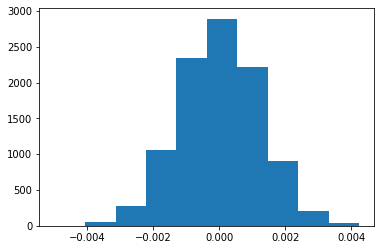

In [14]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [18]:
obs_diff = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
(np.array(p_diffs) > obs_diff).mean()

0.9069

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I found out the proportion of differences in means greater than the null value or the probability of observing differences in means greater than the null value given that the null hypothesis is true. This value is the p-value. The p-value of 0.9069 is greater than the the type I error rate of 0.05. Therefore we fail to reject the null hypothesis , the conversion rate for the new page is less than or equal to the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm
import statsmodels as ss
convert_old = df2.query('group=="control"') 
convert_new = df2.query('group=="treatment"')
n_old = convert_old.shape[0]
n_new = convert_new.shape[0]
pnew = convert_new['converted'].mean()
pold = convert_old['converted'].mean()
#pnew,pold

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
stat,pval=sm.stats.proportions_ztest(np.array([pnew*n_new,pold*n_old]),np.array([n_new,n_old]),alternative='larger')
stat,pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

According to the table in https://www.statisticshowto.com/z-test/, we can see that the z-score for $\alpha$/2 of 2.5% is 1.96. The value -1.31 is less than 1.96. We fail to reject null hypothesis. The p-value of 0.906 is greater than 0.05. This means that we fail to reject the null hypothesis. The p-value computed is the same as before and the conclusions are also similar.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We have to perform Logistic regression as only 2 possible outcomes need to be predicted.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df_reg = df2
df_reg['intercept'] = 1
df_reg[['control','ab_page']] = pd.get_dummies(df_reg['group'])
df_reg.head()

/Users/ashageorge/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ashageorge/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
logit_mod = sm.Logit(df_reg['converted'],df_reg[['intercept','ab_page']])
res = logit_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:56:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [142]:
np.exp(-0.015)

0.9851119396030626

The coefficient represents a multiplicative change compared to the baseline. Since it very close to 1, there is not much difference between a new page and an old page.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with the model is 0.190. The p-value associated with ab_page is greater than the type I error rate and which means that the choice of the page is not statistically significant which concurs with our finding that we fail to reject the null hypothesis. There is no statistically significant difference between the new and old pages.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are other things that might factor in conversion like time spent on the platform, the goals of the person etc. It would be possible to see whether such factors might have some part to play. The model will obviously get more complex.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(),any(df_new['country'].isna())

(        country                   timestamp      group landing_page  \
 user_id                                                               
 834778       UK  2017-01-14 23:08:43.304998    control     old_page   
 928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
 822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
 711597       UK  2017-01-22 03:14:24.763511    control     old_page   
 710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   
 
          converted  intercept  control  ab_page  
 user_id                                          
 834778           0          1        1        0  
 928468           0          1        0        1  
 822059           1          1        0        1  
 711597           0          1        1        0  
 710616           0          1        0        1  ,
 False)

In [39]:
### Create the necessary dummy variables
df_new.head()
df_new['country'].unique()
country = pd.get_dummies(df_new['country'])
df_new = pd.concat([df_new,country],axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [40]:
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
res = logit_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:01:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The p-values indicate that the country or the type of page has no impact on the conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
### Fit Your Linear Model And Obtain the Results
df_new['abCA'] = df_new['ab_page']*df_new['CA']
df_new['abUK'] = df_new['ab_page']*df_new['UK']
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK','abCA','abUK']])
res = logit_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 29 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        16:21:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
abCA          -0.0469      0.054     -0.872      0.383      -0.152       0.059
abUK           0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

Looking at the p-values, the country or the type of page viewed or the interaction between country and page are not statistically significant.

<a id='conclusions'></a>
## Conclusions

We analyzed a data set from a company to decide whether a new page has any impact on the conversion rates. We formulated the null and alternative hypothesis and used bootstrapping to simulate the distribution and computed thep-value. The p-value determined that we fail to reject the null hypothesis- which states that the new page is equal or not as effective as the old page in converting potential users. 
We did the z-test and the regression model to further emphasize our results fromn the hypothesis testing. Finally, we added a country dataset to evaluate whether it has any impact on conversions. We built a logistic regression model with the data and the page, the country and the interactions between the country and the type of the page. We found that the page, the country or the interactions do not influence the person converting.

<a id='references'></a>
## References
1.<a href="https://www.statisticshowto.com/z-test/">Interpreting z-test</a>